In [9]:
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy

Import some library to draw plots, etc.

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Mount Google drive for data set.

In [11]:
class NaiveBayes:

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)
        #empty matrix for parameters
        self._mean = np.zeros((n_classes, n_features))
        self._var = np.zeros((n_classes, n_features))
        self._priors = np.zeros(n_classes)
        #calculation mean var for priro(P(Y)) each class
        for i, c in enumerate(self.classes):
            class_sample = X[y == c]
            self._mean[i, :] = class_sample.mean(axis=0)
            self._var[i, :] = class_sample.var(axis=0)
            self._priors[i] = class_sample.shape[0] / float(n_samples)
    def predict(self, X):
        y_pred=[]
        for x in X:
          posteriors = []
          # calculate posterior probability for each class
          for i, c in enumerate(self.classes):
              prior = np.log(self._priors[i])
              posterior = np.sum(np.log(self._pdf(i, x)))
              posterior = posterior + prior
              posteriors.append(posterior)
          y_pred.append(self.classes[np.argmax(posteriors)])
        return np.array(y_pred)
    #gaussian distribtuion
    def _pdf(self, i, x):
        return np.exp(-np.power(x - self._mean[i], 2.) / (2 * self._var[i])) / (2*np.pi*self._var[i])**0.5

Implementing Naive Bayes from scratch to mastery. Cover all the essential concepts and implementation details of the Naive Bayes algorithm.

In [12]:

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

Calculate accuracy.

In [13]:

df = pd.read_csv('/content/drive/MyDrive/ML/data.csv')

# Replace 'M' with 1 and 'B' with 0 in the 'diagnosis' column
df["diagnosis"] = df["diagnosis"].replace({'M': 1, 'B': 0})

# Separate the target variable (y) and features (X)
y = df["diagnosis"].values
X = df.drop(columns=['id', 'diagnosis', 'Unnamed: 32']).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=5)

Read data and cleaning data set.

<ipython-input-11-7378b6ca7e74>:24: RuntimeWarning: divide by zero encountered in log
  posterior = np.sum(np.log(self._pdf(i, x)))


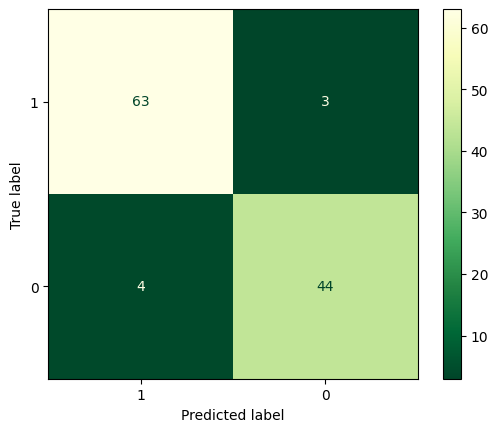

Naive Bayes accuracy 0.9385964912280702
Precision score: 0.9361702127659575
Recall score: 0.9166666666666666


In [14]:
nb = NaiveBayes()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1, 0])
cmap = plt.get_cmap('YlGn_r')

cm_display.plot(cmap=cmap)
plt.show()

print("accuracy", accuracy(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Calculate and draw a confusion matrix for the Naive Bayes. Also, calculate the accuracy, recall, and precision score.

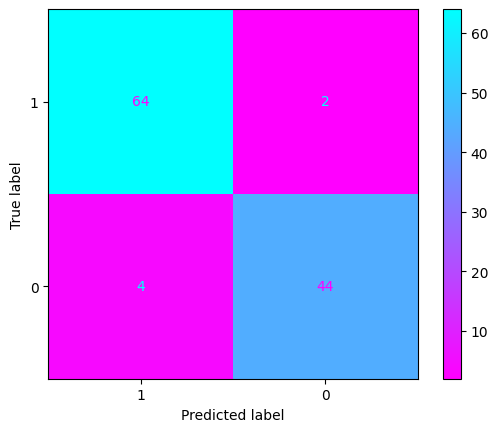

accuracy: 0.9473684210526315
Precision: 0.9565217391304348
Recall: 0.9166666666666666


In [17]:
from sklearn.naive_bayes import GaussianNB
gnaiveb = GaussianNB()
gnaiveb.fit(X_train, y_train)
y_pred=gnaiveb.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1, 0])
cmap = plt.get_cmap('cool_r')

cm_display.plot(cmap=cmap)
plt.show()
print("accuracy:", accuracy(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Implementing Naive Bayes with library. calculate and draw a confusion matrix for the Naive Bayes. Also, calculate the accuracy, recall, and precision score.
